In [7]:
# !pip install tensorflow


NameError: name 'python' is not defined

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


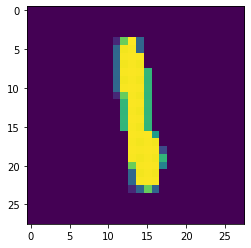

In [11]:
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# X_test[1,:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# # # importing the required module
import matplotlib.pyplot as plt

# # # plotting the points
plt.imshow(X_train[200])

# # function to show the plot
# plt.show()


In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

#model 1 menggunakan Multilayer Neural Network

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [3]:

model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))
model1.save('my_model.h5')

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 0.4073 - acc: 0.8886 - val_loss: 0.2296 - val_acc: 0.9331
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1977 - acc: 0.9428 - val_loss: 0.1656 - val_acc: 0.9517
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1476 - acc: 0.9567 - val_loss: 0.1386 - val_acc: 0.9592
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1189 - acc: 0.9656 - val_loss: 0.1173 - val_acc: 0.9660
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1004 - acc: 0.9710 - val_loss: 0.1093 - val_acc: 0.9671
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0860 - acc: 0.9753 - val_loss: 0.1028 - val_acc: 0.9690
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0749 - acc: 0.9785 - val_loss: 0.0986 - val_acc: 0.9696
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.

In [4]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (100, 784)                0         
_________________________________________________________________
dense (Dense)                (100, 64)                 50240     
_________________________________________________________________
dense_1 (Dense)              (100, 10)                 650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0837 - acc: 0.9741


[0.08370501548051834, 0.9740999937057495]

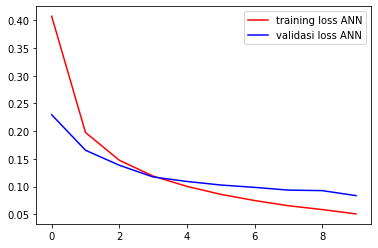

In [6]:
import matplotlib.pyplot as plt

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [7]:
import numpy as np
from keras.models import load_model

model_simpan = load_model('my_model.h5')
pred = model_simpan.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#model2 menggunakan Convolutional Neural Network

model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [9]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [10]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history2 = model2.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))
model2.save('my_model2.h5')

Epoch 1/10
600/600 [==============================] - 60s 99ms/step - loss: 0.2386 - acc: 0.9294 - val_loss: 0.0708 - val_acc: 0.9771
Epoch 2/10
600/600 [==============================] - 64s 106ms/step - loss: 0.0689 - acc: 0.9790 - val_loss: 0.0554 - val_acc: 0.9818
Epoch 3/10
600/600 [==============================] - 67s 112ms/step - loss: 0.0488 - acc: 0.9850 - val_loss: 0.0421 - val_acc: 0.9865
Epoch 4/10
600/600 [==============================] - 62s 103ms/step - loss: 0.0369 - acc: 0.9884 - val_loss: 0.0355 - val_acc: 0.9879
Epoch 5/10
600/600 [==============================] - 59s 99ms/step - loss: 0.0304 - acc: 0.9908 - val_loss: 0.0372 - val_acc: 0.9883
Epoch 6/10
600/600 [==============================] - 59s 98ms/step - loss: 0.0246 - acc: 0.9920 - val_loss: 0.0345 - val_acc: 0.9885
Epoch 7/10
600/600 [==============================] - 59s 98ms/step - loss: 0.0205 - acc: 0.9935 - val_loss: 0.0317 - val_acc: 0.9897
Epoch 8/10
600/600 [==============================] - 59s 9

In [11]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0381 - acc: 0.9882


[0.038137953728437424, 0.9882000088691711]

In [12]:
import numpy as np
from keras.models import load_model

model_simpan2 = load_model('my_model2.h5')
pred = model_simpan2.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


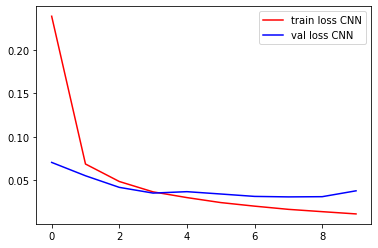

In [13]:
import matplotlib.pyplot as plt

epochs = range(10)

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r',label='train loss CNN')
plt.plot(epochs,val_loss2,'b',label='val loss CNN')
plt.legend()

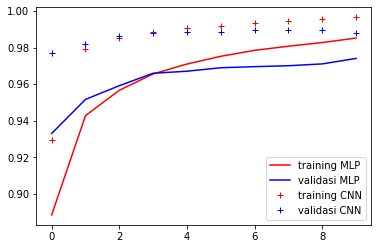

In [14]:
import matplotlib.pyplot as plt

epochs = range(10)

acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

plt.plot(epochs,acc1,'r',label='training MLP')
plt.plot(epochs,val_acc1,'b',label='validasi MLP')

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

plt.plot(epochs,acc2,'r+',label='training CNN')
plt.plot(epochs,val_acc2,'b+',label='validasi CNN')
plt.legend()

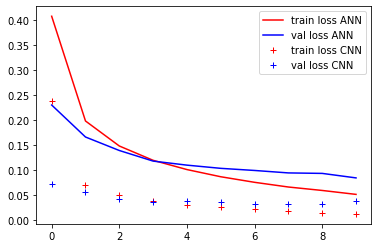

In [15]:
import matplotlib.pyplot as plt

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#model 3 Convolutional Neural Network dengan Dropout

model3 = Sequential()
model3.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model3.add(MaxPooling2D(2,2))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10,activation='softmax'))

In [17]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                100416    
_________________________________________________________________
dropout (Dropout)            (None, 64)               

In [18]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

history3 = model3.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 59s 97ms/step - loss: 0.4428 - acc: 0.8619 - val_loss: 0.0825 - val_acc: 0.9735
Epoch 2/10
600/600 [==============================] - 59s 98ms/step - loss: 0.1574 - acc: 0.9535 - val_loss: 0.0508 - val_acc: 0.9824
Epoch 3/10
600/600 [==============================] - 59s 99ms/step - loss: 0.1184 - acc: 0.9641 - val_loss: 0.0428 - val_acc: 0.9854
Epoch 4/10
600/600 [==============================] - 59s 99ms/step - loss: 0.1008 - acc: 0.9701 - val_loss: 0.0405 - val_acc: 0.9876
Epoch 5/10
600/600 [==============================] - 59s 98ms/step - loss: 0.0873 - acc: 0.9744 - val_loss: 0.0340 - val_acc: 0.9886
Epoch 6/10
600/600 [==============================] - 59s 98ms/step - loss: 0.0788 - acc: 0.9761 - val_loss: 0.0361 - val_acc: 0.9874 a - ETA: 0s - loss: 0.0788 - acc: 0
Epoch 7/10
600/600 [==============================] - 59s 98ms/step - loss: 0.0698 - acc: 0.9788 - val_loss: 0.0315 - val_acc: 0.9891ss: 0.0698 - acc
Epoch 8/10

In [19]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0294 - acc: 0.9897


[0.029388558119535446, 0.9897000193595886]

In [20]:
pred = model3.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


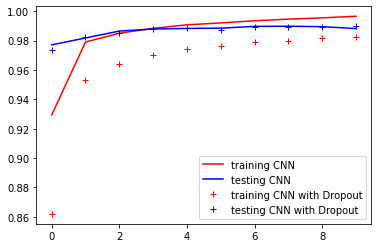

In [21]:
import matplotlib.pyplot as plt

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

epochs = range(10)

plt.plot(epochs,acc2,'r',label='training CNN')
plt.plot(epochs,val_acc2,'b',label='testing CNN')

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

plt.plot(epochs,acc3,'r+',label='training CNN with Dropout')
plt.plot(epochs,val_acc3,'b+',label='testing CNN with Dropout')
plt.legend()

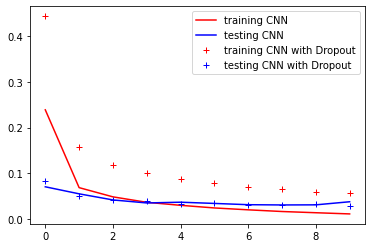

In [22]:
import matplotlib.pyplot as plt

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(10)

plt.plot(epochs,loss2,'r',label='training CNN')
plt.plot(epochs,val_loss2,'b',label='testing CNN')

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

plt.plot(epochs,loss3,'r+',label='training CNN with Dropout')
plt.plot(epochs,val_loss3,'b+',label='testing CNN with Dropout')
plt.legend()